### Expint implementation

In [1]:
using PyPlot, PyCall, Polynomials
@pyimport scipy.special as scipy_special
include("../src/misc/expint.jl")

INFO: Loading help data...


expint (generic function with 1 method)

In [2]:
rhos = logspace(-6, 6)
scipy_E1 = scipy_special.exp1(1./rhos)
my_E1 = zeros(scipy_E1)
for i = 1:length(my_E1)
    my_E1[i] = expint(1/rhos[i])
end

In [3]:
errors = scipy_E1 - my_E1
relative_errors = errors./scipy_E1

50-element Array{Float64,1}:
 NaN          
 NaN          
 NaN          
 NaN          
 NaN          
 NaN          
 NaN          
 NaN          
 NaN          
 NaN          
 NaN          
 NaN          
 NaN          
   ⋮          
   1.26235e-16
   0.0        
   2.17601e-16
   0.0        
   1.9119e-16 
   1.80251e-16
   1.70495e-16
   0.0        
   1.53842e-16
   0.0        
   2.80306e-16
   1.34183e-16

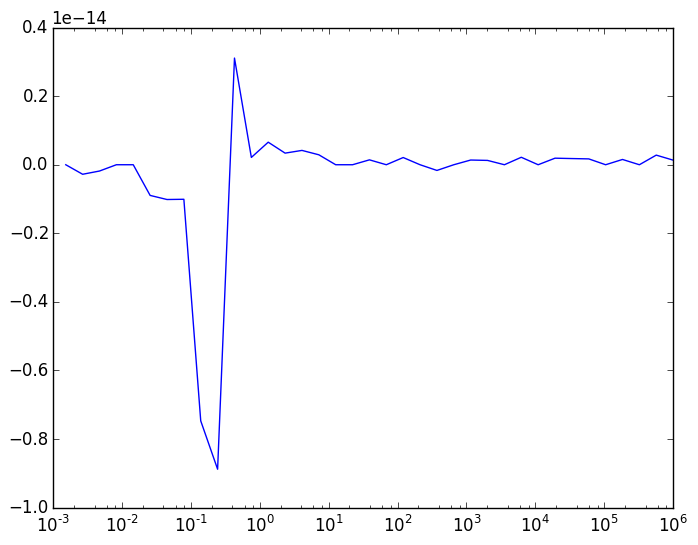

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11c3aeb90>

In [4]:
semilogx(rhos, relative_errors)

### CSI function implementation

In [5]:
using CoordinatedPrecoding
include("../src/misc/utilities.jl")
include("../src/misc/partitions.jl")
include("../src/assignment/BranchAndBoundClustering.jl")

Tc = 2700

Is = 2:16; Kc = 2
M = 8; N = 2; d = 1

prelogs_general = zeros(Float64, length(Is))
prelogs_specific = zeros(Float64, length(Is))
for (idx, i) in enumerate(Is)
    Ms = M*ones(i); Ns = N*ones(i*Kc); ds = d*ones(i*Kc);
    
    network = setup_random_large_scale_network(i, Kc, N, M, num_streams=d)
    draw_user_drop!(network)
    channel = draw_channel(network)
    LargeScaleFadingCellAssignment!(channel, network)
    assignment = get_assignment(network)
    
    prelogs_general[idx] = max(0, 1 - CSI_acquisition_symbol_overhead(Block(IntSet(1:i)), Ns, Ms, ds, assignment)/Tc)
    prelogs_specific[idx] = symmetric_prelog_cluster_sdma(i, 1, Tc, i, M, Kc, N, d)
end

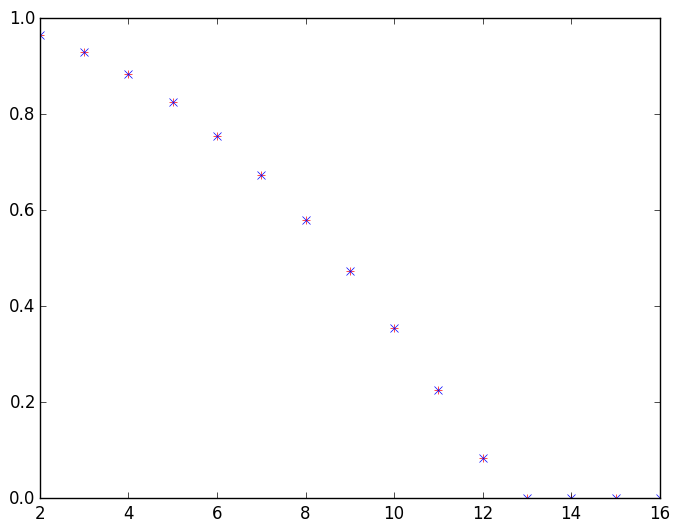

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12131c310>

In [6]:
PyPlot.plot(Is, prelogs_general, "r+")
PyPlot.plot(Is, prelogs_specific, "bx")